Highly multiplexed immunofluorescence imaging of human tissues and tumors using t-CyCIF and conventional optical microscopes

ShortName: lin2018highly

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://lincs.hms.harvard.edu/lin-elife-2018/

In [4]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [1]:
path = '/home/yzy/projects/SODB/SODB_code/SODB/revision/Raw2Anndata/SpatialProteomics/t-CyCIF/data/rawdata_Figure10_TMApanels'


In [5]:
raw_pd = pd.read_csv(f'{path}/TMA00n.csv')

In [6]:
raw_pd

Hoechst2   Hoechst3  Hoechst4   Hoechst5  Hoechst6   Hoechst7  \
0      7865.978   9715.835  4561.678   6641.182  4285.196   9331.224   
1      8164.967  10329.300  5194.970   7312.290  4853.133  11476.060   
2      8419.372  10444.914  5218.693   6269.077  4814.262  11517.901   
3     12336.430  14560.875  7423.339   9342.423  5746.929  12685.938   
4     10105.886  11911.703  5901.731   9131.831  5224.954  13285.807   
...         ...        ...       ...        ...       ...        ...   
1980   6737.205   8215.814  4447.441   9744.695  4050.100   9929.583   
1981   8490.006   6856.907  3856.123   9183.941  4343.467  10182.943   
1982   8384.449  10717.426  5236.053  12982.847  5435.686  13958.980   
1983   9893.182  12988.737  6464.272  16375.854  6943.158  17048.246   
1984   1849.727   2422.573  2000.251   3168.324  2067.189   4428.525   

      Hoechst8   Hoechst9      pAKT     Ki67  ...  pS6_235     HER2  \
0     3155.047   8616.463  1248.432  491.854  ...  629.326  309.115   
1     4065.409  11098.351  1625.532  591.814  ...  776.678  305.388   
2     4084.199  11493.466  1433.140  568.196  ...  724.983  308.485   
3     4125.056  11026.510  1439.216  621.186  ...  626.076  339.842   
4     4713.485  13189.502  1928.741  520.462  ...  711.247  310.137   
...        ...        ...       ...      ...  ...      ...      ...   
1980  3566.134   7292.822  1023.360  471.374  ...  294.143  295.214   
1981  3370.321   6801.337  2374.964  437.250  ...  326.140  289.501   
1982  5014.100  11044.273  1995.146  591.219  ...  364.145  333.224   
1983  6143.498  13593.886  1079.073  650.836  ...  351.829  314.159   
1984  2246.287   4563.370   406.757  335.932  ...  356.437  282.134   

       Vimentin   Catenin     NGFR    HCSred  Area   Circ         X         Y  
0       118.292   959.828  280.252  2381.589   112  0.932  1206.277   339.964  
1       120.615  2563.676  293.216  2681.241   198  0.681  1176.500   349.929  
2       121.005  2595.879  290.334  3046.612   116  0.965  1249.379   345.879  
3       111.237  2357.670  286.726  2534.042    96  0.992  1277.167   349.646  
4       127.475  2517.359  277.616  2689.319   106  0.962  1184.783   352.453  
...         ...       ...      ...       ...   ...    ...       ...       ...  
1980   3303.513   355.718  294.449  7977.339   111  0.964   419.122  1391.878  
1981   4639.526   472.716  281.797  4811.201   112  0.973   475.393  1443.991  
1982  11975.244   480.147  348.142  8420.587   142  0.945   697.063  1471.197  
1983    998.220   414.787  308.865  8971.068   151  0.909   734.308  1479.374  
1984     98.927   286.239  290.069  1471.100   110  0.985  1431.964  1871.000  

[1985 rows x 36 columns]

In [7]:
var_list = []
obs_list = []
obs_keyword_list = ['Area','Circ','X','Y']
for var in raw_pd.columns:
    if 'Hoechst' in var:
        obs_list.append(var)
    elif var in obs_keyword_list:
        obs_list.append(var)
    else:
        var_list.append(var)



In [10]:
var_list

['pAKT',
 'Ki67',
 'pERK',
 'EGFR',
 'E_Cadherin',
 'PCNA',
 'MET',
 'MitoTacker',
 'A555',
 'pCTD2',
 'CD45',
 'VEGFR',
 'Keratin',
 'PD_L1_PE',
 'CD4',
 'ActinRed',
 'hmC',
 'p21',
 'pS6_235',
 'HER2',
 'Vimentin',
 'Catenin',
 'NGFR',
 'HCSred']

In [11]:
obs_list

['Hoechst2',
 'Hoechst3',
 'Hoechst4',
 'Hoechst5',
 'Hoechst6',
 'Hoechst7',
 'Hoechst8',
 'Hoechst9',
 'Area',
 'Circ',
 'X',
 'Y']

In [16]:
X = np.array(raw_pd.loc[:,var_list].values).astype('float')

In [17]:
raw_pd[['X']].values

array([[1206.277],
       [1176.5  ],
       [1249.379],
       ...,
       [ 697.063],
       [ 734.308],
       [1431.964]])

In [18]:
adata = ad.AnnData(X)
adata.var_names = var_list
for obs in obs_list:
    adata.obs[obs] = raw_pd[[obs]].values

/tmp/ipykernel_1059064/848963088.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


In [19]:
adata.obsm['spatial'] = np.vstack([adata.obs['X'],adata.obs['Y']]).transpose()

# run all

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


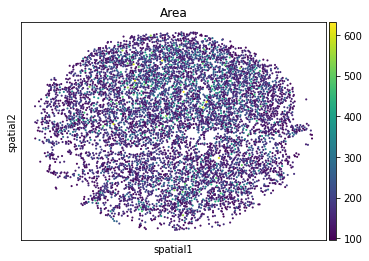

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


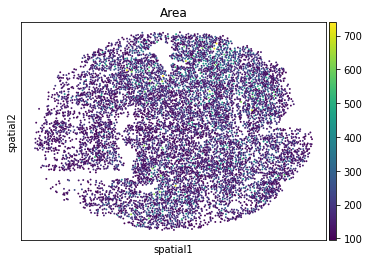

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


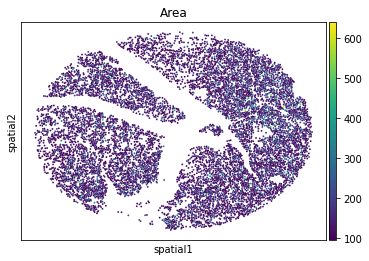

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


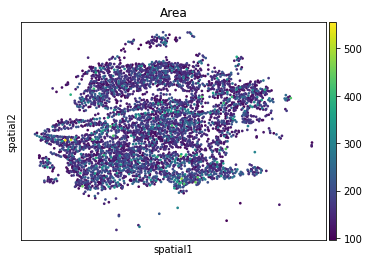

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


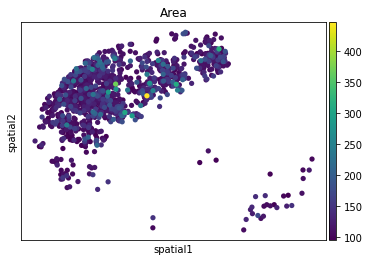

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


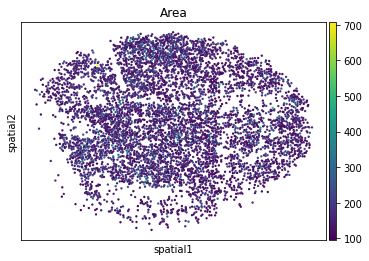

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


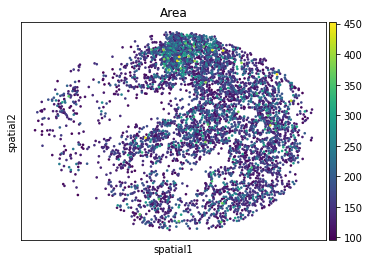

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


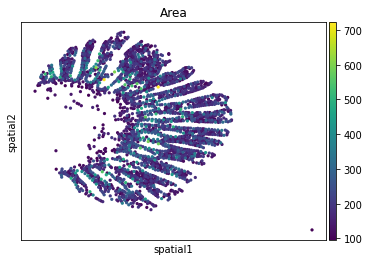

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


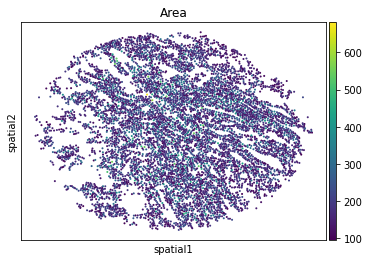

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


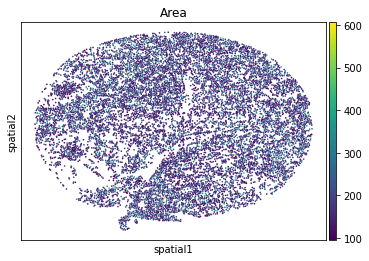

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


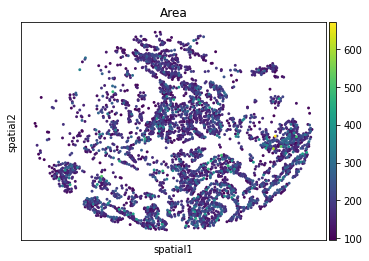

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


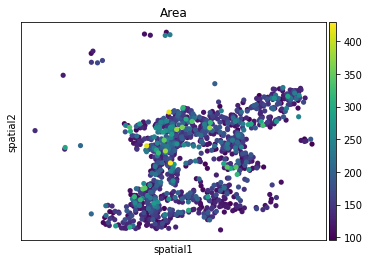

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


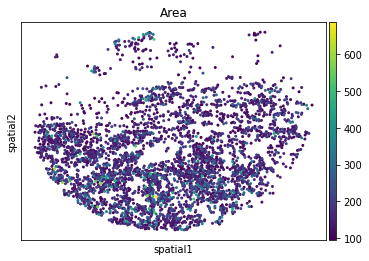

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


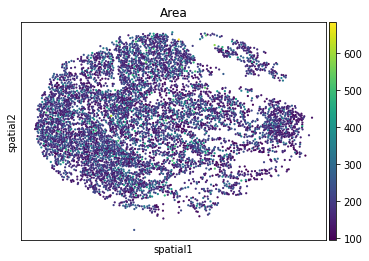

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


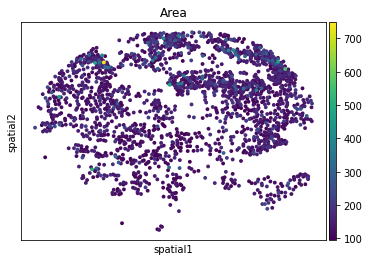

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


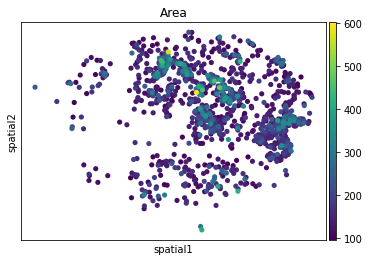

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


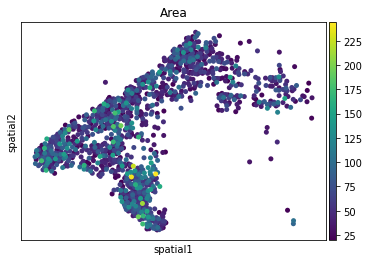

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


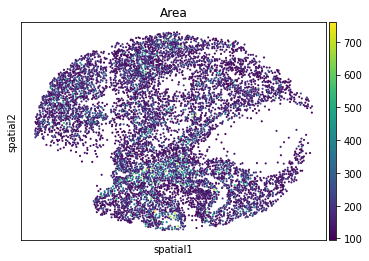

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


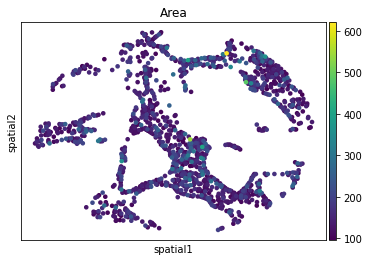

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


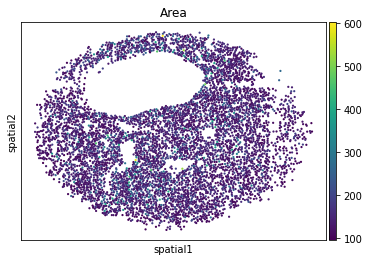

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


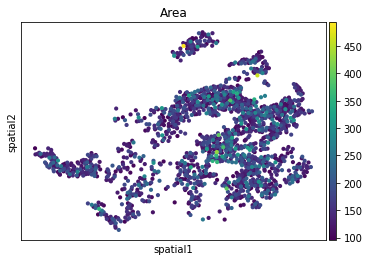

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


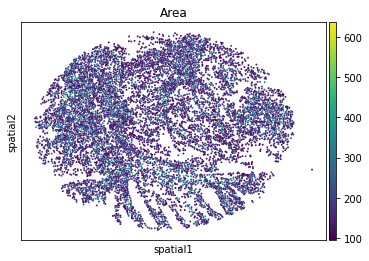

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


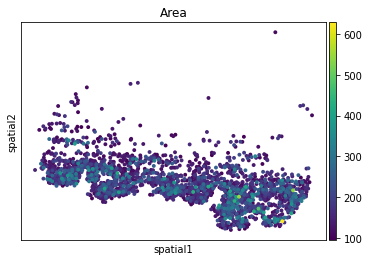

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


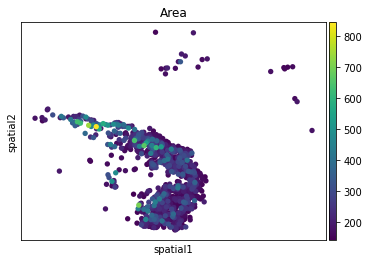

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


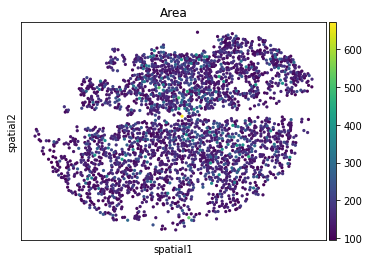

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


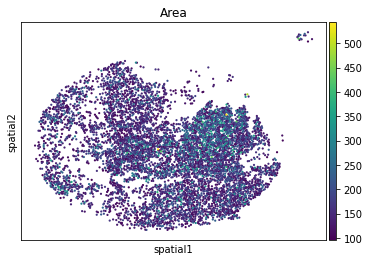

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


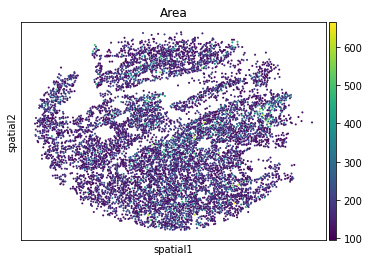

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


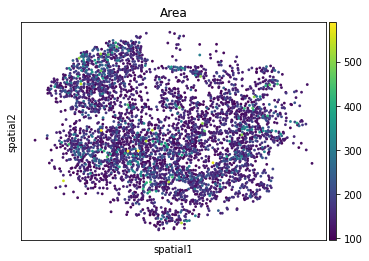

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


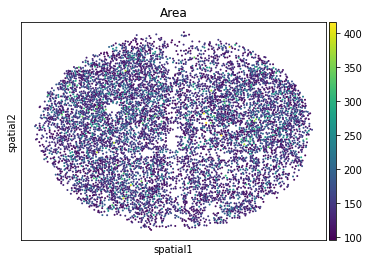

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


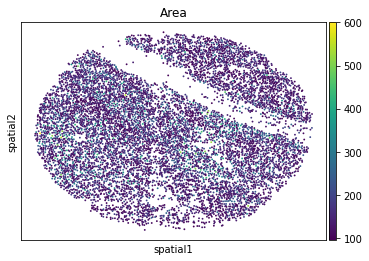

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


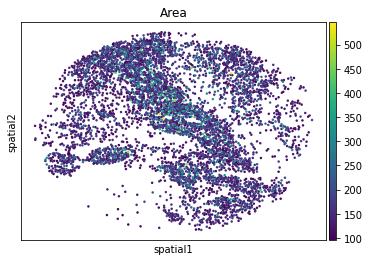

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


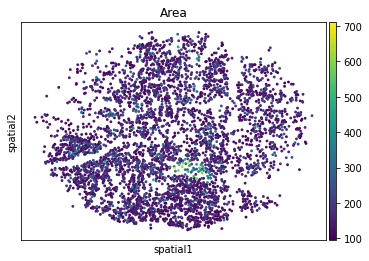

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


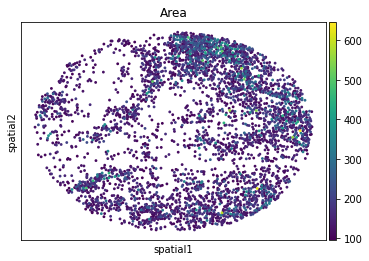

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


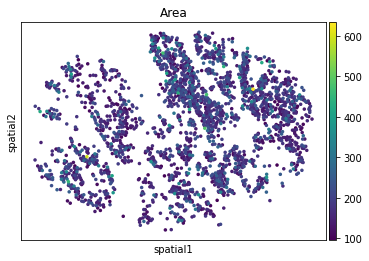

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


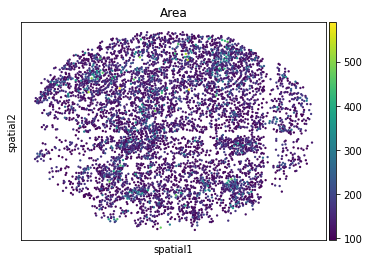

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


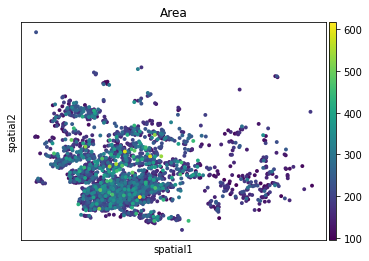

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


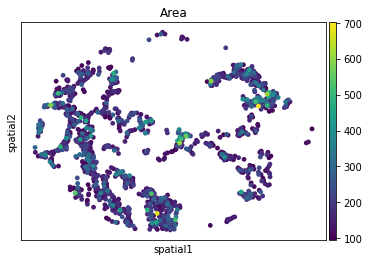

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


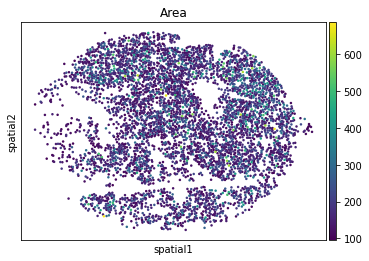

/tmp/ipykernel_1059064/4220888944.py:20: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


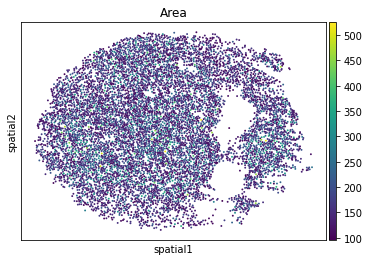

In [25]:
for file in os.listdir(path):
    if 'csv' not in file:
        continue
    sample_name = file.split('.')[0]
    raw_pd = pd.read_csv(f'{path}/{file}')

    var_list = []
    obs_list = []
    obs_keyword_list = ['Area','Circ','X','Y']
    for var in raw_pd.columns:
        if 'Hoechst' in var:
            obs_list.append(var)
        elif var in obs_keyword_list:
            obs_list.append(var)
        else:
            var_list.append(var)


    X = np.array(raw_pd.loc[:,var_list].values).astype('float')
    adata = ad.AnnData(X)
    adata.var_names = var_list
    for obs in obs_list:
        adata.obs[obs] = raw_pd[[obs]].values

    adata.obsm['spatial'] = np.vstack([adata.obs['X'],adata.obs['Y']]).transpose()
    adata.write_h5ad(f'Figure10_TMApanels_{sample_name}.h5ad')
    sc.pl.embedding(adata,basis='spatial',color='Area')

In [ ]:
for file in os.listdir(path):
    if 'csv' not in file:
        continue
    sample_name = file.split('.')[0]
    